In [1]:
#importing the necessary libraries 
!pip install emoji
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import scipy.stats #for getting the critical values
import emoji

#import matplotlib.font_manager as fm
#prop = fm.FontProperties(fname='/usr/share/fonts/truetype/emoji/EmojiOneColor-SVGinOT.ttf')

Defaulting to user installation because normal site-packages is not writeable


In [2]:
full_data = pd.read_stata('data_fig/data_python_1.dta')

In [3]:
full_data

,phase,treatment,session_id,period,group,case_id,female,decision_1,n_invest_subject,group_success1,session_size,num_fem_session
0,1.0,Baseline,1.0,1,1,1.0,Male,0,2.0,1,12.0,2.0
1,1.0,Baseline,1.0,2,1,1.0,Male,0,2.0,0,12.0,2.0
2,1.0,Baseline,1.0,3,1,1.0,Male,0,2.0,0,12.0,2.0
3,1.0,Baseline,1.0,4,1,1.0,Male,1,2.0,1,12.0,2.0
4,1.0,Baseline,1.0,5,1,1.0,Male,1,2.0,1,12.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2845,1.0,Pos_Neg,41.0,6,4,525.0,Female,0,4.0,1,24.0,12.0
2846,1.0,Pos_Neg,41.0,7,1,525.0,Female,1,4.0,1,24.0,12.0
2847,1.0,Pos_Neg,41.0,8,2,525.0,Female,0,4.0,1,24.0,12.0
2848,1.0,Pos_Neg,41.0,9,6,525.0,Female,1,4.0,1,24.0,12.0


In [4]:
def cols_for_error_bars(df):
    df['sqrt_count'] = df['count'].apply(lambda x: math.sqrt(x))
    df['critical values - t dist'] = scipy.stats.t.ppf((1 + 0.95)/2, df['count']-1)
    df['hi'] = df['mean'] + df['critical values - t dist']*\
                        (df['std']/df['sqrt_count'])
    df['low'] = df['mean'] - df['critical values - t dist']*\
                        (df['std']/df['sqrt_count'])
    df['ci- one tail'] = (df['hi']-df['low'])/2

# Figure A1(a): Total Investment , by treatment - Phase 1

In [5]:
#a dataframe with period and treatment as indices, with investment as super column,
#mean, std dev, count (number of obeservations) as sub-columns 

data_by_period_treatment = full_data.groupby(['period','treatment'],observed=True).\
                           agg({'n_invest_subject':['mean', 'std','count']})

#chosing crosssection, of period 1, and investment (supercolumn)
#look at the dataframes individually to get the idea

df_period1 = data_by_period_treatment.loc[1]['n_invest_subject']

In [6]:
data_by_period_treatment

n_invest_subject                
                             mean       std count
period treatment                                 
1      Baseline          2.386667  1.859187    75
       Positive          2.733333  2.002251    75
       Negative          2.883333  2.591326    60
       Pos_Neg           2.933333  2.532669    75
2      Baseline          2.386667  1.859187    75
       Positive          2.733333  2.002251    75
       Negative          2.883333  2.591326    60
       Pos_Neg           2.933333  2.532669    75
3      Baseline          2.386667  1.859187    75
       Positive          2.733333  2.002251    75
       Negative          2.883333  2.591326    60
       Pos_Neg           2.933333  2.532669    75
4      Baseline          2.386667  1.859187    75
       Positive          2.733333  2.002251    75
       Negative          2.883333  2.591326    60
       Pos_Neg           2.933333  2.532669    75
5      Baseline          2.386667  1.859187    75
       Positive          2.733333  2.002251    75
       Negative          2.883333  2.591326    60
       Pos_Neg           2.933333  2.532669    75
6      Baseline          2.386667  1.859187    75
       Positive          2.733333  2.002251    75
       Negative          2.883333  2.591326    60
       Pos_Neg           2.933333  2.532669    75
7      Baseline          2.386667  1.859187    75
       Positive          2.733333  2.002251    75
       Negative          2.883333  2.591326    60
       Pos_Neg           2.933333  2.532669    75
8      Baseline          2.386667  1.859187    75
       Positive          2.733333  2.002251    75
       Negative          2.883333  2.591326    60
       Pos_Neg           2.933333  2.532669    75
9      Baseline          2.386667  1.859187    75
       Positive          2.733333  2.002251    75
       Negative          2.883333  2.591326    60
       Pos_Neg           2.933333  2.532669    75
10     Baseline          2.386667  1.859187    75
       Positive          2.733333  2.002251    75
       Negative          2.883333  2.591326    60
       Pos_Neg           2.933333  2.532669    75

In [7]:
#generating the necessary columns required to calculate confidence interval
cols_for_error_bars(df_period1)

In [8]:
df_period1

,mean,std,count,sqrt_count,critical values - t dist,hi,low,ci- one tail
treatment,,,,,,,,
Baseline,2.386667,1.859187,75,8.660254,1.992543,2.814427,1.958907,0.427760
Positive,2.733333,2.002251,75,8.660254,1.992543,3.194009,2.272657,0.460676
Negative,2.883333,2.591326,60,7.745967,2.000995,3.552744,2.213923,0.669411
Pos_Neg,2.933333,2.532669,75,8.660254,1.992543,3.516048,2.350619,0.582714


In [9]:
positive = "Treatment" + emoji.emojize(" :smiling_face: ")
negative = "Treatment" + emoji.emojize(" :frowning_face: ")
positive_negative = "Treatment" + emoji.emojize(" :smiling_face:") + emoji.emojize(" :frowning_face: ")
treatment_emojis = ['Baseline',positive, negative, positive_negative]

In [10]:
colors = sns.color_palette(['tab:blue','tab:green','tab:red','tab:orange',], n_colors=4)

C:\Users\priyo\AppData\Local\Temp\ipykernel_17556\3545776322.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df_period1.index, y='mean', data = df_period1, palette= colors, zorder=2)


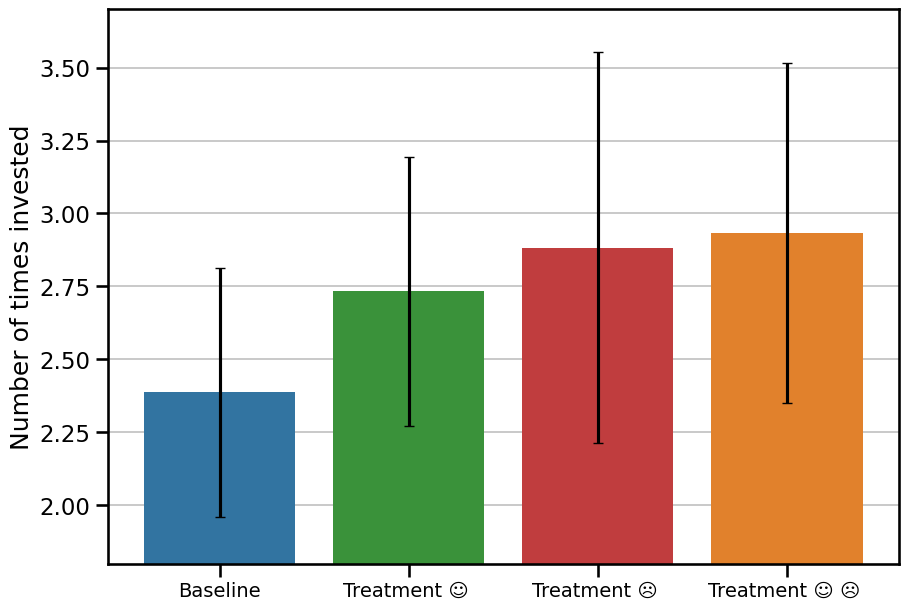

In [11]:
#plotting fig 1 a

sns.set_context("talk")
fig = plt.figure(figsize=(10.2,7.2), dpi = 100)

plt.grid(axis= 'y', color='black', linestyle='-', linewidth=0.3, zorder=1)
sns.barplot(x= df_period1.index, y='mean', data = df_period1, palette= colors, zorder=2)
plt.errorbar(x= df_period1.index, y=df_period1['mean'], yerr=df_period1['ci- one tail'],\
            fmt = " ", label= "",ecolor='black',capsize=3.5, zorder=3)

#plt.legend(loc='center', bbox_to_anchor=(0.5,-0.15))
plt.xlabel('\n')
plt.ylabel('Number of times invested')
plt.xticks(range(len(df_period1.index)), treatment_emojis , fontsize=14)
plt.ylim([1.8,3.7])

plt.show()

fig.savefig('output_fig/Figure A1(a).png', bbox_inches='tight', dpi=150)

# Figure A1(b): Group Investment, by treatment - Phase 1

In [12]:
# 1. Collapse (group) your full_data
#    This produces a MultiIndex DataFrame with the mean of group_success1.
group_cols = ['treatment', 'phase', 'session_id', 'group', 'period']
df = (
    full_data
    .groupby(group_cols, observed=True)  # explicit observed argument to silence warnings
    .agg({'group_success1': 'mean'})
    .reset_index()
)
df

,treatment,phase,session_id,group,period,group_success1
0,Baseline,1.0,1.0,1,1,1.0
1,Baseline,1.0,1.0,1,2,0.0
2,Baseline,1.0,1.0,1,3,0.0
3,Baseline,1.0,1.0,1,4,1.0
4,Baseline,1.0,1.0,1,5,1.0
...,...,...,...,...,...,...
945,Pos_Neg,1.0,41.0,8,6,1.0
946,Pos_Neg,1.0,41.0,8,7,1.0
947,Pos_Neg,1.0,41.0,8,8,0.0
948,Pos_Neg,1.0,41.0,8,9,1.0


In [13]:
df['group_success1'] = (df['group_success1'] > 0).astype(int)


In [14]:
df


,treatment,phase,session_id,group,period,group_success1
0,Baseline,1.0,1.0,1,1,1
1,Baseline,1.0,1.0,1,2,0
2,Baseline,1.0,1.0,1,3,0
3,Baseline,1.0,1.0,1,4,1
4,Baseline,1.0,1.0,1,5,1
...,...,...,...,...,...,...
945,Pos_Neg,1.0,41.0,8,6,1
946,Pos_Neg,1.0,41.0,8,7,1
947,Pos_Neg,1.0,41.0,8,8,0
948,Pos_Neg,1.0,41.0,8,9,1


In [15]:
# Using named aggregation for flat columns
df_summary = (
    df
    .groupby('treatment', observed=True)
    .agg(
        mean=('group_success1', 'mean'),
        std=('group_success1', 'std'),
        count=('group_success1', 'count')
    )
    .reset_index()
)

print(df_summary)

  treatment   mean       std  count
0  Baseline  0.716  0.451841    250
1  Positive  0.820  0.384958    250
2  Negative  0.865  0.342581    200
3   Pos_Neg  0.880  0.325613    250


In [16]:
cols_for_error_bars(df_summary)


In [17]:
df_summary

,treatment,mean,std,count,sqrt_count,critical values - t dist,hi,low,ci- one tail
0,Baseline,0.716,0.451841,250,15.811388,1.969537,0.772283,0.659717,0.056283
1,Positive,0.820,0.384958,250,15.811388,1.969537,0.867952,0.772048,0.047952
2,Negative,0.865,0.342581,200,14.142136,1.971957,0.912769,0.817231,0.047769
3,Pos_Neg,0.880,0.325613,250,15.811388,1.969537,0.920560,0.839440,0.040560


C:\Users\priyo\AppData\Local\Temp\ipykernel_17556\1145107073.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= df_summary.index, y='mean', data = df_summary, palette= colors, zorder=1)


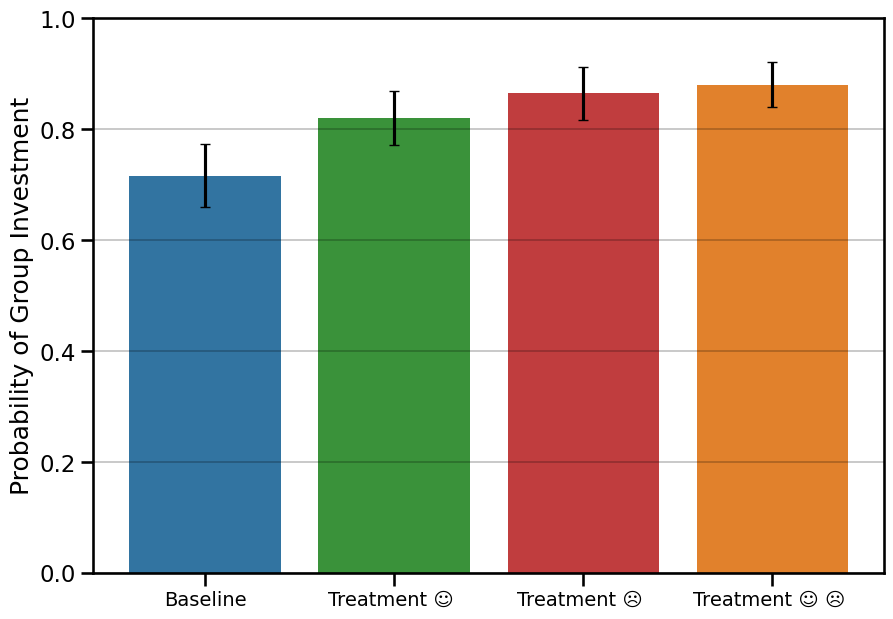

In [18]:
# Assuming df looks like this:
# treatment | mean | std | count

sns.set_context("talk")
fig = plt.figure(figsize=(10.2,7.2), dpi = 100)

plt.grid(axis= 'y', color='black', linestyle='-', linewidth=0.3, zorder=1)
sns.barplot(x= df_summary.index, y='mean', data = df_summary, palette= colors, zorder=1)
plt.errorbar(x= df_summary.index, y=df_summary['mean'], yerr=df_summary['ci- one tail'],\
            fmt = " ", label= "",ecolor='black',capsize=3.5, zorder=2)

#plt.legend(loc='center', bbox_to_anchor=(0.5,-0.15))
plt.xlabel('\n')
plt.ylabel('Probability of Group Investment')
plt.xticks(ticks=range(len(df_summary)), labels=treatment_emojis, fontsize=14)
plt.ylim([0, 1])

plt.show()
fig.savefig('output_fig/Figure A1(b).png', bbox_inches='tight', dpi=150)


# Figure A3(a): Gender gap in investment across treatments - Phase 1

In [19]:
data_by_female_treatment = full_data.groupby(['period','female','treatment'],observed=True).agg({'n_invest_subject':['mean', 'std','count']})

In [20]:
data_by_female_treatment

n_invest_subject                
                                    mean       std count
period female treatment                                 
1      Male   Baseline          1.975610  1.650573    41
              Positive          2.615385  2.097811    39
              Negative          2.387097  2.883024    31
              Pos_Neg           2.923077  2.442869    39
       Female Baseline          2.882353  1.996432    34
...                                  ...       ...   ...
10     Male   Pos_Neg           2.923077  2.442869    39
       Female Baseline          2.882353  1.996432    34
              Positive          2.861111  1.914647    36
              Negative          3.413793  2.163285    29
              Pos_Neg           2.944444  2.661304    36

[80 rows x 3 columns]

In [21]:
# 1. cross‐section to period==1, female=='Male'
men = data_by_female_treatment.loc[(1, 'Male'), :]
# 2. select the n_invest_subject block
men_df = men['n_invest_subject'].copy()

# 3. clean up the column names
men_df.columns = ['mean','std','count']
men_df.index.name = 'treatment'

cols_for_error_bars(men_df)
men_df

,mean,std,count,sqrt_count,critical values - t dist,hi,low,ci- one tail
treatment,,,,,,,,
Baseline,1.975610,1.650573,41,6.403124,2.021075,2.496595,1.454625,0.520985
Positive,2.615385,2.097811,39,6.244998,2.024394,3.295416,1.935353,0.680032
Negative,2.387097,2.883024,31,5.567764,2.042272,3.444599,1.329595,1.057502
Pos_Neg,2.923077,2.442869,39,6.244998,2.024394,3.714964,2.131190,0.791887


In [22]:
# 1. cross‐section to period==1, female=='Male'
female = data_by_female_treatment.loc[(1, 'Female'), :]
# 2. select the n_invest_subject block
female_df = female['n_invest_subject'].copy()

# 3. clean up the column names
female_df.columns = ['mean','std','count']
female_df.index.name = 'treatment'

cols_for_error_bars(female_df)
female_df

,mean,std,count,sqrt_count,critical values - t dist,hi,low,ci- one tail
treatment,,,,,,,,
Baseline,2.882353,1.996432,34,5.830952,2.034515,3.578941,2.185765,0.696588
Positive,2.861111,1.914647,36,6.000000,2.030108,3.508935,2.213288,0.647823
Negative,3.413793,2.163285,29,5.385165,2.048407,4.236663,2.590923,0.822870
Pos_Neg,2.944444,2.661304,36,6.000000,2.030108,3.844900,2.043989,0.900456


In [23]:
# vertical stack with a new outer index level “gender”
combined = pd.concat(
    {'Male':   men_df,
     'Female': female_df},
    axis=0,
    names=['female', 'treatment']
)

combined

mean       std  count  sqrt_count  \
female treatment                                          
Male   Baseline   1.975610  1.650573     41    6.403124   
       Positive   2.615385  2.097811     39    6.244998   
       Negative   2.387097  2.883024     31    5.567764   
       Pos_Neg    2.923077  2.442869     39    6.244998   
Female Baseline   2.882353  1.996432     34    5.830952   
       Positive   2.861111  1.914647     36    6.000000   
       Negative   3.413793  2.163285     29    5.385165   
       Pos_Neg    2.944444  2.661304     36    6.000000   

                  critical values - t dist        hi       low  ci- one tail  
female treatment                                                              
Male   Baseline                   2.021075  2.496595  1.454625      0.520985  
       Positive                   2.024394  3.295416  1.935353      0.680032  
       Negative                   2.042272  3.444599  1.329595      1.057502  
       Pos_Neg                    2.024394  3.714964  2.131190      0.791887  
Female Baseline                   2.034515  3.578941  2.185765      0.696588  
       Positive                   2.030108  3.508935  2.213288      0.647823  
       Negative                   2.048407  4.236663  2.590923      0.822870  
       Pos_Neg                    2.030108  3.844900  2.043989      0.900456

In [24]:
# make female & treatment into columns
combined = combined.reset_index()

# now you can pivot
means = combined.pivot(index='treatment', columns='female', values='mean')
err   = combined.pivot(index='treatment', columns='female', values='ci- one tail')

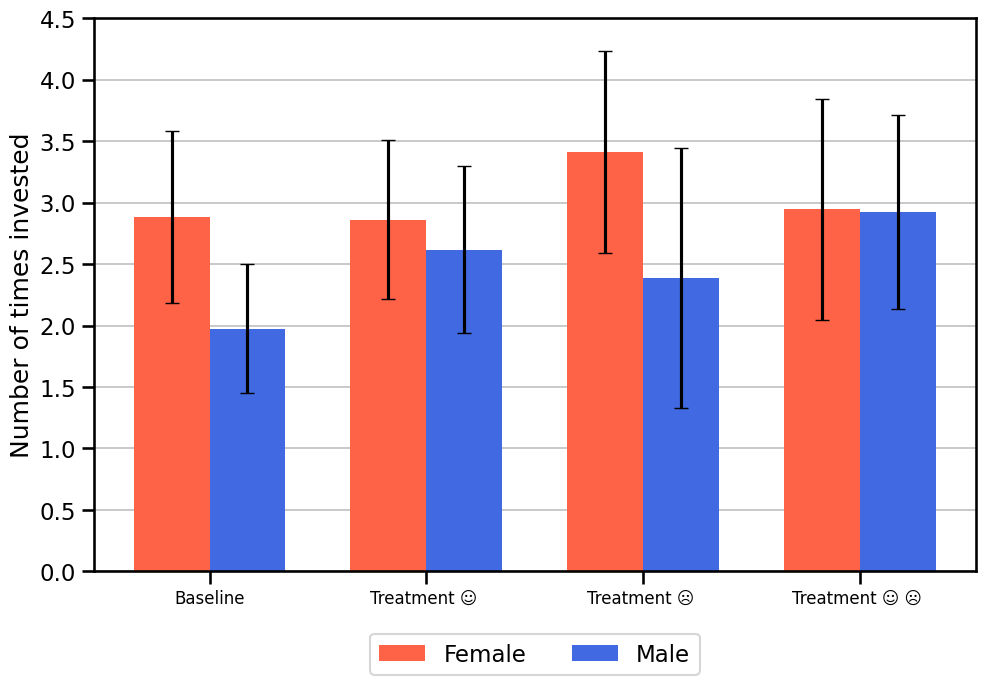

In [25]:
treatments = means.index
x = np.arange(len(treatments))
width = 0.35  # width of each bar

fig, ax = plt.subplots(figsize=(10.2, 7.2), dpi=100)
# Female bars on the left
ax.bar(
    x - width/2,
    means['Female'],
    width,
    yerr=err['Female'],
    capsize=5,
    label='Female',
    color='tomato',
    zorder=2,
)

# Male bars on the right
ax.bar(
    x + width/2,
    means['Male'],
    width,
    yerr=err['Male'],
    capsize=5,
    label='Male',
    color='royalblue',
    zorder=2,
)

ax.grid(axis='y', linestyle='-', linewidth=0.3, color='black', zorder=1)
ax.set_xticks(x)
ax.set_ylim(0, 4.5)
ax.set_xticklabels(treatment_emojis, fontsize=12)
ax.set_ylabel('Number of times invested')
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.show()



fig.savefig('output_fig/Figure A3(a).png', bbox_inches='tight', dpi=150)



# Figure A4: Gender-gap across treatment over period- Phase 1

In [26]:
full_data

,phase,treatment,session_id,period,group,case_id,female,decision_1,n_invest_subject,group_success1,session_size,num_fem_session
0,1.0,Baseline,1.0,1,1,1.0,Male,0,2.0,1,12.0,2.0
1,1.0,Baseline,1.0,2,1,1.0,Male,0,2.0,0,12.0,2.0
2,1.0,Baseline,1.0,3,1,1.0,Male,0,2.0,0,12.0,2.0
3,1.0,Baseline,1.0,4,1,1.0,Male,1,2.0,1,12.0,2.0
4,1.0,Baseline,1.0,5,1,1.0,Male,1,2.0,1,12.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2845,1.0,Pos_Neg,41.0,6,4,525.0,Female,0,4.0,1,24.0,12.0
2846,1.0,Pos_Neg,41.0,7,1,525.0,Female,1,4.0,1,24.0,12.0
2847,1.0,Pos_Neg,41.0,8,2,525.0,Female,0,4.0,1,24.0,12.0
2848,1.0,Pos_Neg,41.0,9,6,525.0,Female,1,4.0,1,24.0,12.0


In [27]:
fig3b = full_data.groupby(['treatment','period', 'female'],observed=True).agg({'decision_1':'mean'})
fig3b.reset_index(level=['treatment','period','female'],inplace=True)
print(fig3b)

   treatment  period  female  decision_1
0   Baseline       1    Male    0.243902
1   Baseline       1  Female    0.352941
2   Baseline       2    Male    0.195122
3   Baseline       2  Female    0.382353
4   Baseline       3    Male    0.170732
..       ...     ...     ...         ...
75   Pos_Neg       8  Female    0.277778
76   Pos_Neg       9    Male    0.282051
77   Pos_Neg       9  Female    0.305556
78   Pos_Neg      10    Male    0.358974
79   Pos_Neg      10  Female    0.138889

[80 rows x 4 columns]


In [28]:
positive_a = "(b) Treatment" + emoji.emojize(" :smiling_face: ")
negative_a = "(c) Treatment" + emoji.emojize(" :frowning_face: ")
positive_negative_a = "(d) Treatment" + emoji.emojize(" :smiling_face:") + emoji.emojize(" :frowning_face: ")
treatment_emojis = ['Baseline',positive_a, negative_a, positive_negative_a, 'Baseline-R']

In [29]:

# 1. Aggregate your data by treatment, period, and female
fig3b = (
    full_data
    .groupby(['treatment', 'period', 'female'], observed=True)
    .agg(decision_1=('decision_1', 'mean'))
    .reset_index()
)
fig3b

,treatment,period,female,decision_1
0,Baseline,1,Male,0.243902
1,Baseline,1,Female,0.352941
2,Baseline,2,Male,0.195122
3,Baseline,2,Female,0.382353
4,Baseline,3,Male,0.170732
...,...,...,...,...
75,Pos_Neg,8,Female,0.277778
76,Pos_Neg,9,Male,0.282051
77,Pos_Neg,9,Female,0.305556
78,Pos_Neg,10,Male,0.358974


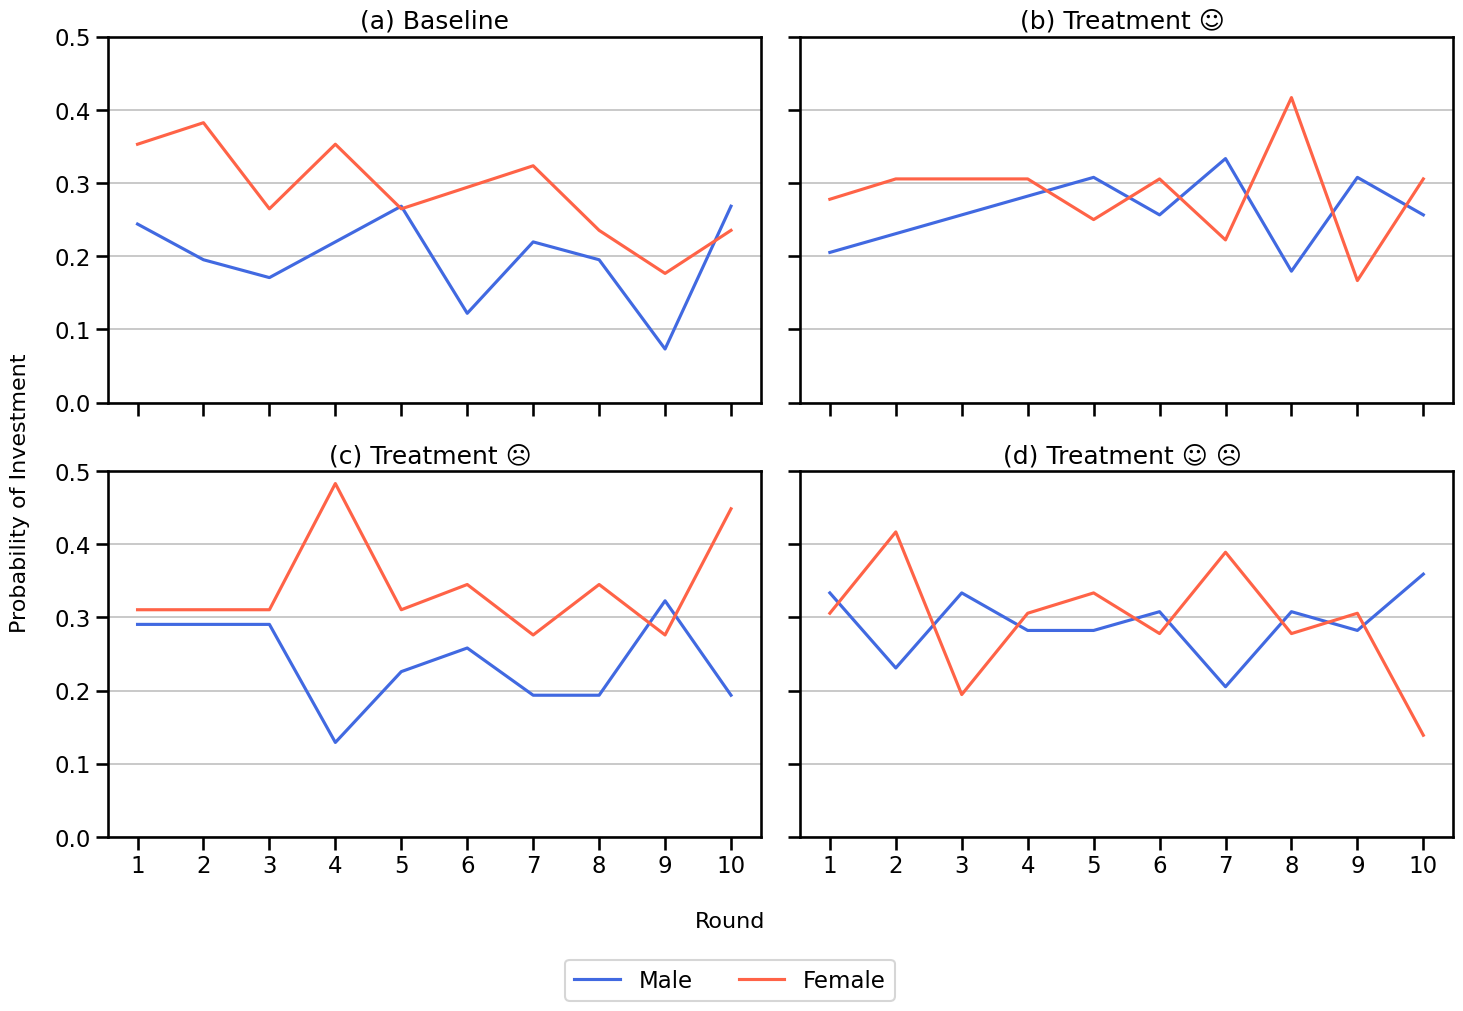

In [30]:
from matplotlib.lines import Line2D

# 2. Define treatments and titles
treatments = ['Baseline', 'Positive', 'Negative', 'Pos_Neg']
titles     = ['(a) Baseline', positive_a, negative_a, positive_negative_a]

# 3. Create subplot grid
fig, axes = plt.subplots(
    nrows=2, ncols=2,
    figsize=(15, 10.2), dpi=100,
    sharex=True, sharey=True
)
axes = axes.flatten()

# 4. Plot each panel without individual legends or axis labels
for ax, treat, title in zip(axes, treatments, titles):
    data_sub = fig3b[fig3b['treatment'] == treat]
    sns.lineplot(
        x='period', 
        y='decision_1', 
        data=data_sub,
        hue='female', 
        palette=['royalblue', 'tomato'],
        legend=False, 
        ax=ax,
        marker=None  # no markers
    )
    ax.set_title(title)
    ax.set_ylim(0, 0.5)
    ax.set_xticks(range(1, 11))
    ax.grid(axis='y', color='black', linestyle='-', linewidth=0.3)
    # Remove per-panel labels
    ax.set_xlabel('')
    ax.set_ylabel('')

# 5. Turn off any unused subplot (last panel if empty)
if len(treatments) < len(axes):
    axes[-1].axis('off')

# 6. Add shared axis labels using supxlabel and supylabel
fig.supxlabel('Round', y=0.07, fontsize=16)
fig.supylabel('Probability of Investment', x=0.02, fontsize=16)

male_handle = Line2D([0], [0], color='royalblue',  linestyle='-', label='Male')
female_handle = Line2D([0], [0], color='tomato',  linestyle='-', label='Female')

# 7. Place a single legend at the bottom of the figure
fig.legend(
    handles=[male_handle, female_handle],
    loc='lower center', ncol=2, frameon=True,
    bbox_to_anchor=(0.5, -0.01)
)
# 8. Layout adjustment and save
plt.tight_layout(rect=[0, 0.05, 1, 1])
fig.savefig('output_fig/Figure A4.png', dpi=200)
plt.show()
